# Projet MAths-Info

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib inline

### Fonctions

In [40]:
omega = 1

def harm(xy):
    x, y = xy
    return np.array([y, -omega*x],dtype = float64)
def ix(x):
    return x
def exp(x):
    return np.exp(x)

## Euler Explicite

In [41]:
def solve_euler_explicit(f, x0, dt,t_f):
    t,x=[0], [x0]
    x_j,t_j=x0,0
    while t_j<t_f:
        x_j=x_j+dt*f(x_j)
        x = vstack([x,x_j])
        t_j+=dt
        t.append(t_j)
    return t,x.T

## Méthode de Heun

In [42]:
def solve_heun(fct,x0,dt,t_f):
    t,x=[0], [x0]
    x_j,t_j=x0,0
    while t_j<t_f:
        k1=fct(x_j)
        k2=fct(x_j+ dt*k1)
        t_j+=dt
        x_j= x_j + dt*(k1+k2)/2
        
        x = vstack([x,x_j])
        t.append(t_j)
    return t,x.T

In [43]:
def erreur(t,experi,fct_theor):
    R=[]
    for time,i in zip(t,experi) :
        R.append(abs(i-fct_theor(time)))
    return R

## Etude de la consistance (1)
------------

In [44]:
delta_t = []
T=np.linspace(0,2,5)
g = lambda x : -1 * np.sin(x)
X=g(T)

erreurmax_heun, erreurmax_eul  = [],[]
for i,z in enumerate([1/n for n in range(1,50)]):   
    t,x=solve_euler_explicit(harm,np.array([-1,0]),z,3)
    u,v=solve_heun(harm,np.array([-1,0]),z,3)
    delta_t.append(z)
    erreurmax_eul.append(max(erreur(t,x[0],g)))
    erreurmax_heun.append(max(erreur(u,v[0],g)))




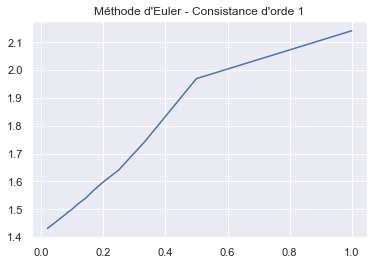

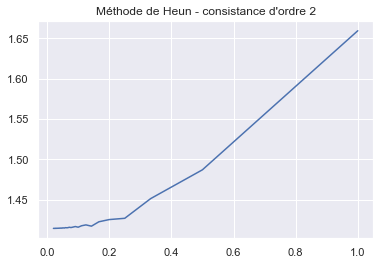

In [45]:
plt.plot(delta_t,erreurmax_eul)
plt.title("Méthode d'Euler - Consistance d'orde 1")
plt.show()

plt.plot(delta_t,erreurmax_heun)
plt.title("Méthode de Heun - consistance d'ordre 2")
plt.show()

** On remarque bien la croissance linéaire et quadratique de $\Delta t$ aux abords de 0**

# Evaluation de l'erreur absolue locale
On construit une nouvelle fonction $x(t)$, solution du problème:
\begin{array}{l}
{\dot{x}=f(t, x(t))} \\
{x(t_j)=x^j}
\end{array} 

On évalue l'erreur, avec un schéma d'Euler explicite: $e^{j+1}= x^j + \int_{t_j}^{t_{j+1}}{f(s,x(s))ds} - x^{j+1} = x(t_{j+1}) - (x^j + \Delta t_jf(t_j,x^j))$

En appliquant la formule de Taylor-Lagrange à la fonction x(t), on obtient:  

<center>$x(t_{j+1}) = x(t_j) +\Delta t_j f(t_j,x(t_j)) + \frac{\Delta t_{j}^2}{2} [\partial_t f(t_j,x^j) + \partial_x f(t_j,x_j) f(t_j, x_j)] + O(\Delta t^3)$ <center>

De plus, puisque **f est $C^1$**, la formule de Taylor-Lagrange donne encore:

<center>$ f(t_{j+1}, x^{j+1}) = f(x^j, t_j) + \partial_t f(t_j,x^j)\Delta t + \partial_x f(t_j,x_j) (x^{j+1}-x^j) +O(\Delta t^2)$<center>

D'un côté, nous estimons l'erreur:
<center>$\|{e^{j+1}}\| = \|\frac{\Delta t_{j}^2}{2} [\partial_t f(t_j,x^j) + \partial_x f(t_j,x_j) f(t_j, x_j)]\| + O(\Delta t^3) $ <center>

Et de l'autre, on calcule: 
<center>$ \frac{\Delta t_{j}}{2}\|f(t_{j+1}, x^{j+1})-f(x^j, t_j)\| = \|\frac{\Delta t_{j}^2}{2} [\partial_t f(t_j,x^j) + \partial_x f(t_j,x_j) f(t_j, x_j)]\| + O(\Delta t^3) $ <center>

CQFD



## Pas de temps adaptatif

- **Montrons que $e^{j+1}$ est un $ O(\Delta t_j^2)$**:
    Rappelons que $e^{j+1}= x^j +\int_{t_j}^{t_{j+1}}{f(s,x(s))ds} - x^{j+1}$\
    On a montré dans la partie précédente qu'on pouvait approximer $\|{e^{j+1}}\| = \|\frac{\Delta t_{j}^2}{2} [\partial_t f(t_j,x^j) + \partial_x f(t_j,x_j) f(t_j, x_j)]\| + o(\Delta t^2)$\
    Or on travaille ici à temps finit. Donc d'après le caractère $ C^1$ de la fonction f,  $\|{e^{j+1}}\| \leq \frac{\Delta t_{j}^2}{2} C + o(\Delta t^2)$ 
    c'est à dire : 
    <center>$\frac{\|{e^{j+1}}\|}{\Delta t_j^2} \leq \frac{C}{2} + o(1) $</center>
    Or $ \frac{C}{2} + o(1)$ est bornée au voisinage de 0, et donc :
    <center>$\frac{\|{e^{j+1}}\|}{\Delta t_j^2}$ est bornée au voisinage de 0</center>
    
    et donc :
    <center>$e^{j+1}= O(\Delta t_j^2)$</center>
- **Montrons que poser $\Delta t_{new} = \Delta t\sqrt{\frac{TOL_{abs}}{||{e^{j+1}}||}}$ est une stratégie possible de pas adaptatif**
    
    _En effet, il est adapté de prendre un $\Delta t_{new}$ de cette forme là car $\Delta t_{new}$ est un $ O(1)$_ 
    - En effet $||{e^{j+1}}||$ est un $O(\Delta t_j^2) $\
        C'est à dire , qu'il existe une fonction B, bornéee au voisinage de 0, telle que : 
        <center>$||{e^{j+1}}||=B(\Delta t_j).\Delta t_j^2$</center>
        D'où :    
        <center>$\Delta t_{new} =\Delta t\sqrt{\frac{TOL_{abs}}{B(\Delta t_j).\Delta t_j^2}}$</center>
        c'est-à-dire 

        <center>$\Delta t_{new} =\sqrt{\frac{TOL_{abs}}{B(\Delta t_j)}}$</center>

    Donc quand $\Delta t_j$ est au voisinage de 0 : $\Delta t_{new}$ ne s'annule pas.

    On veut à terme au voisinage de 0 :
    <center> $||e^{j+1}_{new}|| = Tol_{abs}$</center>
    or :
        
    <center>$||e^{j+1}_{new}||=\|\frac{\Delta t_{new}^2}{2} [\partial_t f(t_j,x^j) + \partial_x f(t_j,x_j) f(t_j, x_j)]\|  = Tol_{abs}$</center>
    et :
    <center> $||e^{j+1}|| = \|\frac{\Delta t_{j}^2}{2} [\partial_t f(t_j,x^j) + \partial_x f(t_j,x_j) f(t_j, x_j)]\|$</center>
    d'où :
    <center> $\frac{Tol_{abs}}{\Delta t_{new}^2} =\frac{||e^{j+1}||}{\Delta t^2} $</center>
    
    Et on a donc bien :
    <center> $\Delta t_{new} =\Delta t\sqrt{\frac{TOL_{abs}}{||{e^{j+1}}||}} $</center>
        

# Euler explicite à pas variable
------------

La fonction suivante code un schéma d'Euler explicite à pas variable : l'erreur commise est estimée à chaque itération et le pas de temps adapté de façon à garder cette erreur en dessous d'un seuil. Le pas reste compris entre dtmin et dtmax fixés par l'utilisateur et sort la solution échantillonnée à dtmax. Vous devrez comprendre le fonctionnement de cette méthode et l'illustrer dans votre projet numérique.

In [46]:
# Ne pas préter attention aux varaibles qui on été rajoutées et qui permmettent de montrer des particularités de # l'algorithme 

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    LDT=[]
    TLDT=[]
    LDT2DT = [0]
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            
            TLDT.append(t_next)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            LDT.append(dt)
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        LDT2DT.append(-dt2DT)
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T,TLDT, LDT, LDT2DT)



### Explication du code 
#### _initialisation_
- dt: pas de temps utilisé à la prochaine itération correspond au $\Delta_j$
- t : coordonnées en temps, initialisée à $t_0$
- $t_i$ : sous-compteur temporel, décrit l'avancement de l'itération dans le $dt_max$
- x : valeurs de la solution

#### _Process_

- **Tant que** on est pas arrivé à la fin de la zone d'étude 
    - **Tant que** le sous compteur $t_i$ est encore à moins de de $dt_{max}$ du précédent point enregistré dans x
        - on fait un pas de méthode de euler de pas dt vers les X positifs, on enregistre cette nouvelle position 
        - on fait un pas de méthode de Euler de pas dt vers les X négatifs
        - On évalue ainsi deux fois l'erreur commise
        - on en déduit la nouvelle formule du pas en utilisant la formule du pas adaptatif ( le 0.9 correspon à un garde fou)
        - on vérifie bien que notre nouveau pas dt est entre les délimitations $dt_{min}$ et $dt_{max}/2$
        - on se met dans l'état de la nouvelle position calculée 5 étapes plus haut 
    - on calcule de combien on a dépassé de $dt_{max}$, (cela correspond à `dt2DT`)
    - on fait un pas de Euler en arrière de longueur `dt2DT` **on est donc à dtmax de l'enregistrement précédent** et on refixe $t_i$ à 0 on se prépare à commencer une nouvelle avance de dt_max. Ona  le droi tde considérer que ce saut en arrière est précis , car comme ce pas est plus petit que le dernier pas , l'erreur globale est nécessairement plus faible.
    - On enregistre cette nouvelle position dans x, elle correspondra a une des coordonnées affichées en sortie, et sera le point de départ du nouveau passage de boucle
   
#### _Sortie_

- On renvoit les temps et les positions des points effectivement enregistrés ( espacés de $dt_{max}$)


## Pas variable  - système raide
------------
### Initialisation

In [47]:
def f(xabc):
    xa, xb, xc = xabc
    return array([-0.04 * xb + 1e4 * xb * xc, 0.04 * xa - 1e4 * xb * xc - 3e7 * xb**2,  3e7 * xb**2])

t0, tf, x0 = 0.0, 0.5, array([1.0, 0.0, 0.0])

C:\Users\Paplex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Paplex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


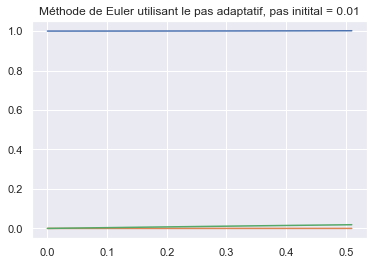

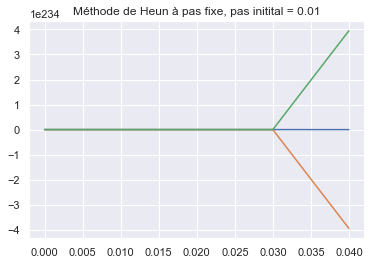

In [48]:
t, x,TLDT, LDT, LDT2DT = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf, dtmin = 1e-20, atol = 1e-6, dtmax = 0.01)
pas = 0.01
u, v = solve_heun(f, x0, pas,tf )
figure()
plot(t, x[0])
plot(t, x[1])
plot(t, x[2])
plt.title(f'Méthode de Euler utilisant le pas adaptatif, pas initital = {pas}')
plt.show()
plot(u,v[0])
plot(u,v[1])
plot(u,v[2])
plt.title(f'Méthode de Heun à pas fixe, pas initital = {pas}')
plt.show()

**Ici on remarque qu'un pas variable permet malgré un pas de base élevé de garder la stabilité de la soltion de l'équation, alors que le pas fixe de la méthode de Heun laisse exploser la solution**

### Pas variable

Text(0.5, 1.0, 'valeur de pas adaptée')

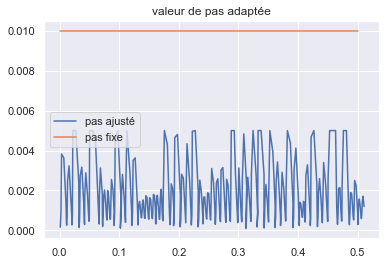

In [49]:
plt.plot(TLDT,LDT, label='pas ajusté')

plt.plot(u,[pas for i in range(len(u))],label = 'pas fixe')
plt.legend()
plt.title('valeur de pas adaptée')

In [50]:
print("Nombre d'itération HEUN : " ,len(v[0]))
print("Nombre d'itération EULER ADAPTATIF : ", len(LDT))


Nombre d'itération HEUN :  51
Nombre d'itération EULER ADAPTATIF :  409


- On remarque que le nombre de calculs est ici à priori est plus important pour la méthode dite de _Euler adaptative_ , ce qui le signe que le pas initial fixé est trop haut.
- L'étude de la courbe tracée ci-dessus permet de déterminer la valeur de pas optimale qui permet de limiter l'erreur globale. **Exemple** : ici une valeur de 0.01 semble adapter pour rester inférieur à la tolérance de $10^{-6}$

### Etude de l'erreur

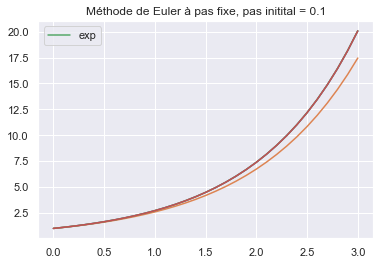

In [51]:
pas = 0.1
t0, tf, x0 = 0.0, 3, array([1])
t, x,TLDT, LDT, LDT2DT = solve_ivp_euler_explicit_variable_step(ix, t0, x0, tf, dtmin = 1e-20, atol = 1e-6, dtmax = pas)
u, v = solve_euler_explicit(ix, x0, pas,tf )
figure()
plot(t, x[0])

plt.title(f'Méthode de Euler utilisant le pas adaptatif, pas initital = {pas}')
plot(u,v[0])
plot(u,exp(u),label = "exp")
plot(u,x[0])
plt.legend()
plt.title(f'Méthode de Euler à pas fixe, pas initital = {pas}')
plt.show()

**Sur cet exemple simple on voit que l'utilisation d'un pas adaptatif, permet de grandement diminuer l'erreur**